In [1]:
pwd

u'/Users/Mukisa/Desktop/iPythonExample'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#input file with all points in uganda
filename = '/Users/Mukisa/Desktop/iPythonExample/PointsInUganda15976.csv'
datadf=pd.read_csv(filename)
data=datadf[['lon','lat']].as_matrix()

In [3]:
testdatadf=pd.DataFrame(data=data,columns=['lon','lat'])
testdata=testdatadf[['lon','lat']].as_matrix()

#historical set
filename2 ='/Users/Mukisa/Desktop/iPythonExample/2014_Data/2014_CMD_Data.csv'
traindatadf= pd.read_csv(filename2)
traindatadf.head()


#Data cleaning to remove unknown locations
traindatadf=traindatadf[traindatadf['lon']>0]
traindatadf.shape

invert = lambda x: 1 if x==0 else 0

# traindatadf['somecount']=traindatadf['CBSD_Incidence']#.apply(invert)

#I give X two inputs for Latitude & longitude, and Y the input set 
X=traindatadf[['lon','lat']].as_matrix()
Y=traindatadf['CMD_Incidence'].as_matrix()[:,None]
print X.shape, Y.shape

(1050, 2) (1050, 1)


In [4]:
np.unique(traindatadf['CMD_Incidence'])
traindatadf.tail(20)

,District,Variety_Sampled,Age,Field_Size(M2),Neighbor_fields,lat,lon,Altitude,CMD_Severity,CMD_Incidence,AdultPopulation,Mean_adult_whitefly_per_Plant
1030,Bushenyi,TME 14,4.0,1560,3,0.21860,30.09895,1137.0,0.0,0.0,32,1.1
1031,Bushenyi,"B ,11",6.0,240,1,0.20581,30.13302,1072.0,3.3,93.3,228,7.6
1032,Bushenyi,TME 14,4.0,1728,2,0.19553,30.18270,1092.0,2.0,16.7,1501,50.0
1033,Bushenyi,Unknown 1,4.0,2560,1,0.18705,30.23239,1074.0,3.4,60.0,279,9.3
1034,Bushenyi,Unknown 2,5.0,1060,2,0.26102,30.10540,1336.0,3.3,20.0,187,6.2
1035,Bushenyi,Unknown 1,7.0,1118,2,0.31001,30.10415,1362.0,0.0,0.0,26,0.9
1036,Bushenyi,Unknown 1,7.0,800,3,0.39222,30.11341,1464.0,2.9,23.3,27,0.9
1037,Bushenyi,Unknown 1,6.0,230,3,0.45685,30.11202,1624.0,0.0,0.0,20,0.7
1038,Bushenyi,"B ,11",4.0,1325,1,0.51236,30.11563,1604.0,0.0,0.0,11,0.4
1039,Bushenyi,"B ,11",3.0,525,1,0.58075,30.13383,1616.0,0.0,0.0,22,0.7


In [5]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot

#it iterates these number of times until it stops
max_iters=100

#Give the kernel 2 input dimensions 
input_dim=2
rbf = GPy.kern.RBF(input_dim)

# create simple GP Model
#     m = GPy.models.SparseGPRegression(X, Y, kernel=rbf, num_inducing=num_inducing)

m = GPy.models.GPRegression(X, Y, kernel=rbf)

# contrain all parameters to be positive (but not inducing inputs)
#m['.*len'] = .04333
m['.*len'] = .0006333  #0.008333
m.checkgrad()

# optimize, run the model & set parameters
m.optimize('tnc', messages=1, max_iters=max_iters)

# plot
#m.plot()

 /Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


NameError: name 'fig' is not defined

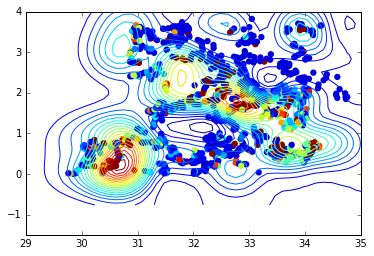

In [6]:
plt.figure(figsize=(12,10))
m.plot()
plt.xlim([29,35])
plt.ylim([-1.5,4])
cbar_ax = fig.add_axes([0.85,0.3,0.02,0.45]) #[0.85, 0.2, 0.05, 0.7]) #left bottom width height
plt.colorbar(im, cmap =cm.YlOrRd, cax = cbar_ax);

In [7]:
m.predict?

In [8]:
#testing the model
meanx,var = m.predict(testdata)
ZZ = meanx
XX = testdata[:,0][:,None]
YY = testdata[:,1][:,None]

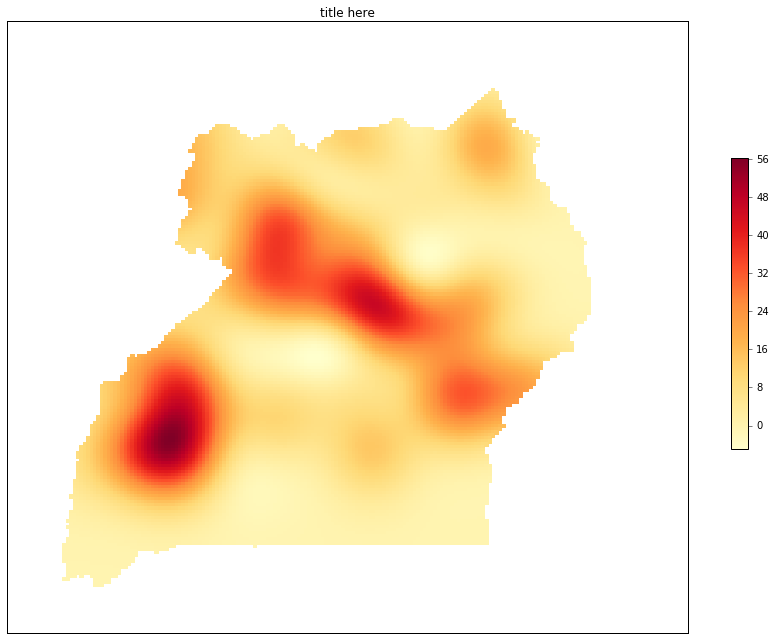

In [9]:
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(12,9), dpi=100)

im = ax.scatter(XX, YY, c = ZZ, cmap = cm.YlOrRd, edgecolor = '',marker='s')
ax.set_xticks([])
ax.set_yticks([])
titlex ='title here'
fontsize=12
ax.set_title(titlex, fontsize= fontsize)

fig.tight_layout()

fig.subplots_adjust(right = 0.80)
#norm = mpl.colors.Normalize(vmin=ymin, vmax=ymax)
cbar_ax = fig.add_axes([0.85,0.3,0.02,0.45]) #[0.85, 0.2, 0.05, 0.7]) #left bottom width height
plt.colorbar(im, cmap =cm.YlOrRd, cax = cbar_ax);

In [18]:
ZZ.shape

(15976, 1)